# Extract hovering data

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style="darkgrid")

# Logs

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-59-14].csv
Dropping 4 rows with datetime errors.


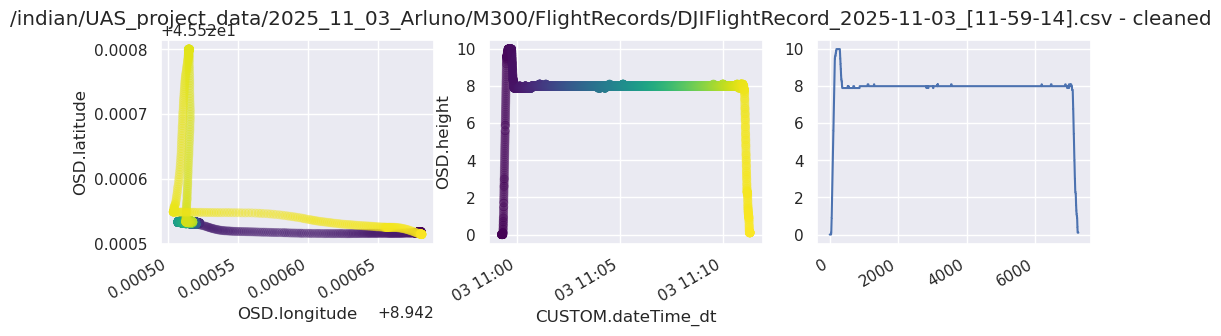

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-19-42].csv
Dropping 3 rows with datetime errors.


/tmp/ipykernel_206524/1895328341.py:19: DtypeWarning: Columns (19,114) have mixed types. Specify dtype option on import or set low_memory=False.
  fr_df = pd.read_csv(filename)


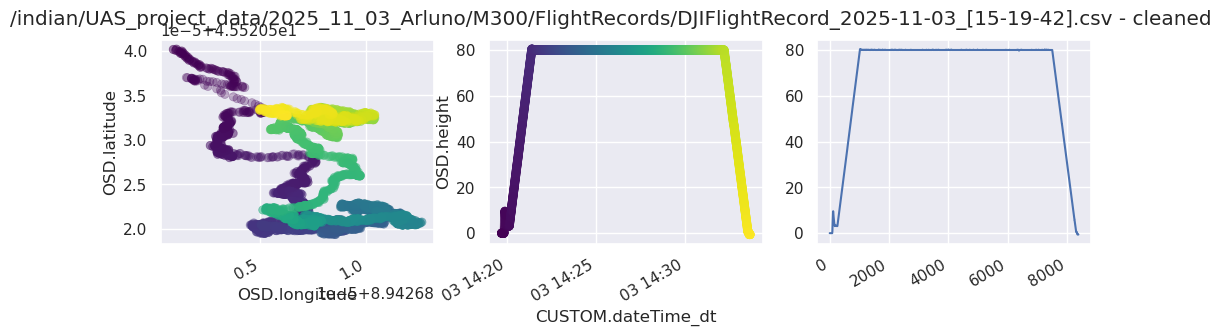

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[14-34-32].csv
Dropping 2 rows with datetime errors.


/tmp/ipykernel_206524/1895328341.py:19: DtypeWarning: Columns (19,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  fr_df = pd.read_csv(filename)


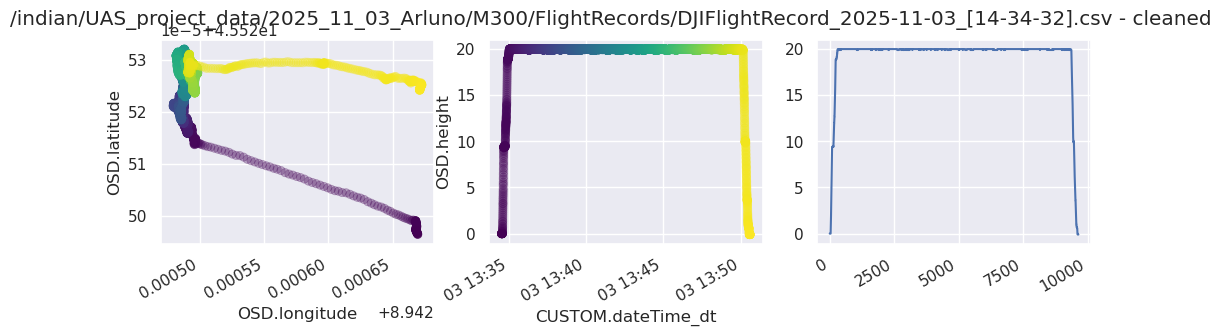

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-01-14].csv
Dropping 1 rows with datetime errors.


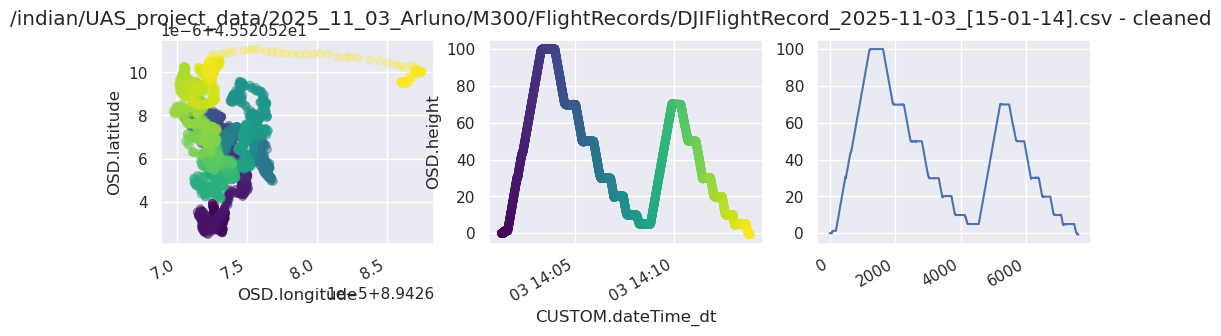

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-46-35].csv
Dropping 3 rows with datetime errors.


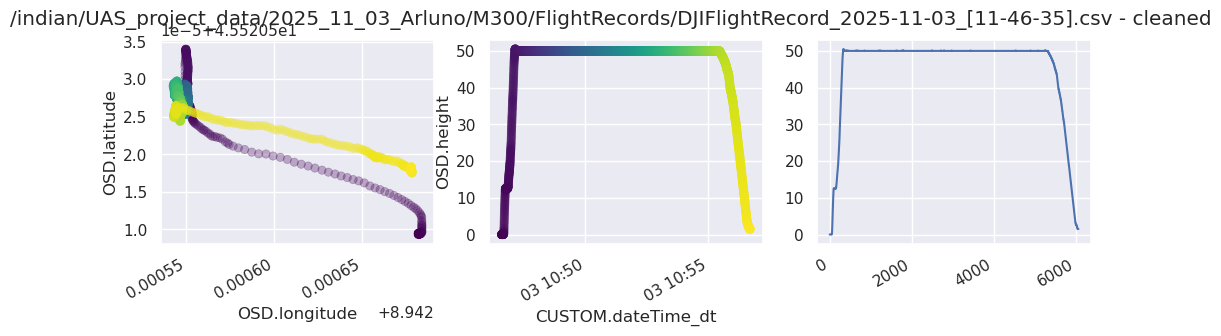

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-46-24].csv
Dropping 1 rows with datetime errors.


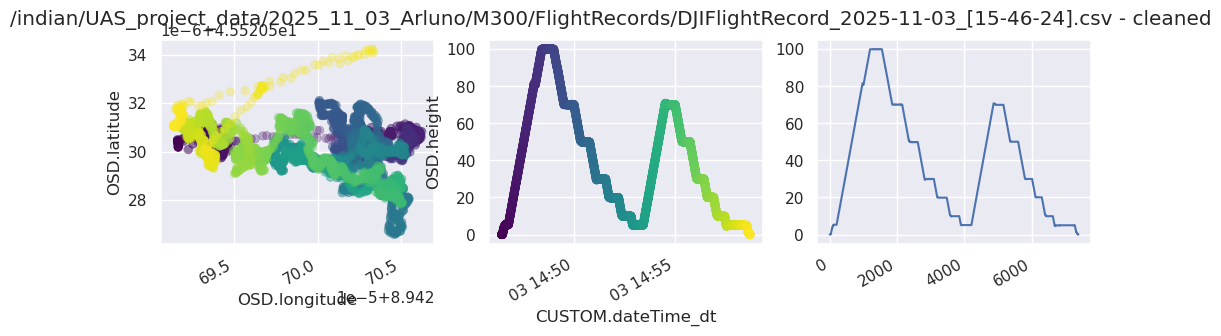

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-37-37].csv
Dropping 2 rows with datetime errors.


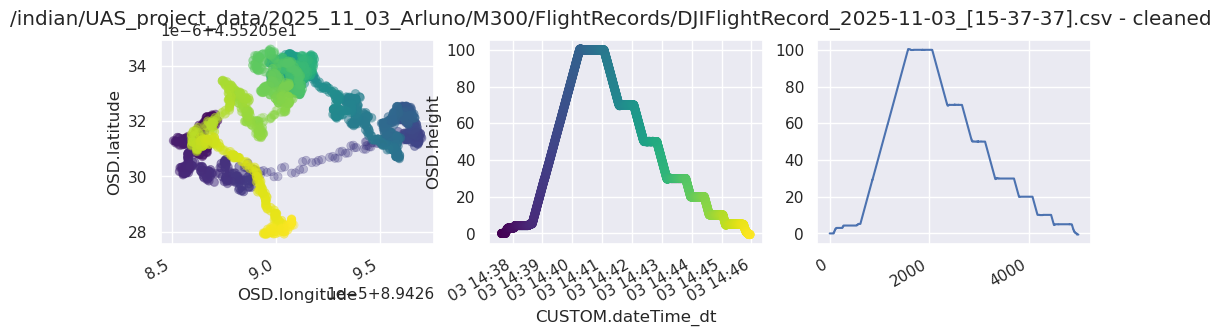

In [2]:
filenames = [
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-59-14].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-19-42].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[14-34-32].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-01-14].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-46-35].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-46-24].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-37-37].csv',
    ]

intervals = {
}

for filename in filenames:
    if filename[-3:] != 'csv': continue

    print(filename)

    fr_df = pd.read_csv(filename)

    # Convert to datetime
    fr_df['CUSTOM.dateTime_dt'] = pd.to_datetime(fr_df['CUSTOM.dateTime'], format='ISO8601',utc=True)
    fr_df['CUSTOM.dateTime_dt']

    # Filter sampling errors.
    median_time = fr_df['CUSTOM.dateTime_dt'].median()
    i_to_drop = fr_df.loc[(fr_df['CUSTOM.dateTime_dt'] > median_time+pd.Timedelta(1,'day')) | (fr_df['CUSTOM.dateTime_dt'] < median_time-pd.Timedelta(1,'day'))].index
    print(f"Dropping {len(i_to_drop)} rows with datetime errors.")
    fr_df.drop(axis=0, index=i_to_drop,inplace=True)


    # Plot trajectory
    fig,axes=plt.subplots(1,3,figsize=(12,3))
    fig.suptitle(f"{filename} - cleaned")

    sns.scatterplot(
            data=fr_df,
            x='OSD.longitude',
            y='OSD.latitude',
            hue='CUSTOM.dateTime_dt',
            legend=False,
            ax=axes[0],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
        )

    sns.scatterplot(
            data=fr_df,
            x='CUSTOM.dateTime_dt',
            y='OSD.height',
            hue='CUSTOM.dateTime_dt',
            legend=False,
            ax=axes[1],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',    
        )

    axes[2].plot(
            fr_df['OSD.height'],
        )


    fig.autofmt_xdate(rotation=30, ha='right')

    plt.show()


# Trisonica

In [3]:
'''
tris_folder = "/indian/UAS_project_data/2025_11_03_Arluno/trisonica"

for tris_file in os.listdir(tris_folder):
    tris_df = pd.read_csv(os.path.join(tris_folder,tris_file),sep=';',header=8)
    
    tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])

    fig,axes=plt.subplots(1,3,figsize=(12,3))
    fig.suptitle(f"{tris_file}")

    sns.scatterplot(
            data=tris_df,
            x=' SKH1_70727633.lon',
            y=' SKH1_70727633.lat',
            hue='Time (UTC) dt',
            legend=False,
            ax=axes[0],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
        )

    sns.scatterplot(
            data=tris_df,
            x='Time (UTC) dt',
            y=' SKH1_70727633.alt',
            hue='Time (UTC) dt',
            legend=False,
            ax=axes[1],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',    
        )

    sns.scatterplot(
            data=tris_df,
            x=' C.pr',
            y=' SKH1_70727633.alt',
            legend=False,
            ax=axes[2],
            edgecolor=None,
            alpha=0.3,
        )

    fig.autofmt_xdate(rotation=30, ha='right')

    plt.show()

'''

'\ntris_folder = "/indian/UAS_project_data/2025_11_03_Arluno/trisonica"\n\nfor tris_file in os.listdir(tris_folder):\n    tris_df = pd.read_csv(os.path.join(tris_folder,tris_file),sep=\';\',header=8)\n\n    tris_df[\'Time (UTC) dt\'] = pd.to_datetime(tris_df[\'Time (UTC)\'])\n\n    fig,axes=plt.subplots(1,3,figsize=(12,3))\n    fig.suptitle(f"{tris_file}")\n\n    sns.scatterplot(\n            data=tris_df,\n            x=\' SKH1_70727633.lon\',\n            y=\' SKH1_70727633.lat\',\n            hue=\'Time (UTC) dt\',\n            legend=False,\n            ax=axes[0],\n            edgecolor=None,\n            alpha=0.3,\n            palette=\'viridis\',\n        )\n\n    sns.scatterplot(\n            data=tris_df,\n            x=\'Time (UTC) dt\',\n            y=\' SKH1_70727633.alt\',\n            hue=\'Time (UTC) dt\',\n            legend=False,\n            ax=axes[1],\n            edgecolor=None,\n            alpha=0.3,\n            palette=\'viridis\',    \n        )\n\n    sns.s

/tmp/ipykernel_206524/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


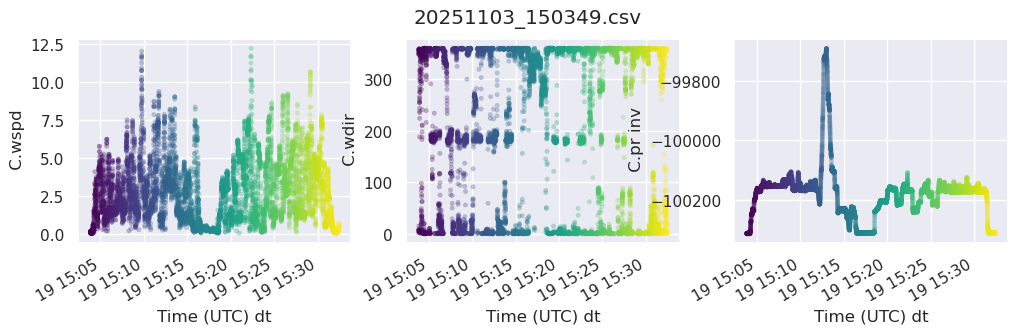

/tmp/ipykernel_206524/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


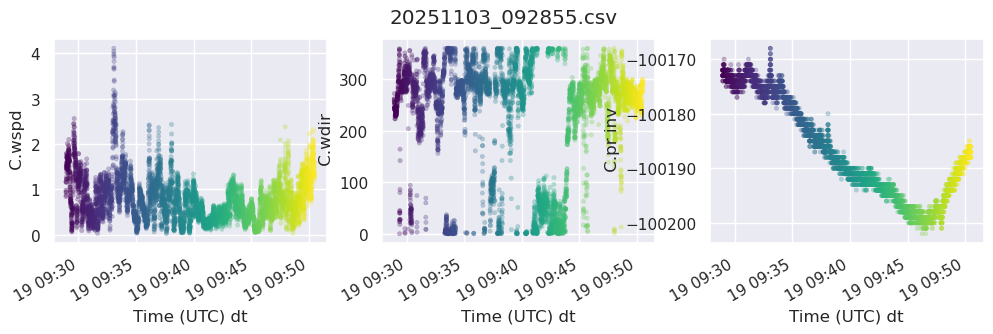

/tmp/ipykernel_206524/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


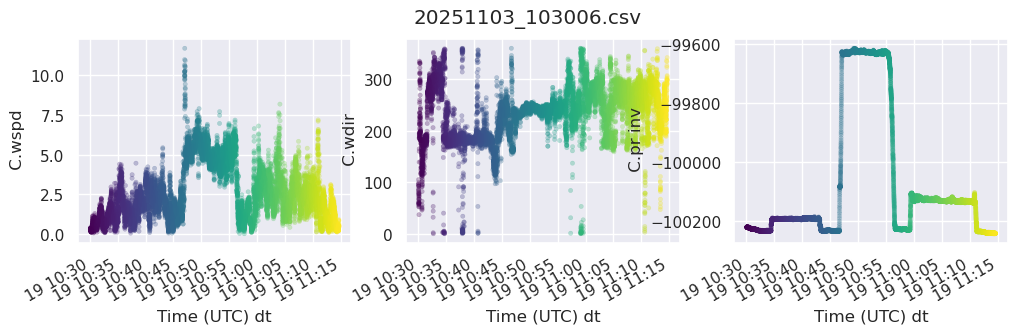

/tmp/ipykernel_206524/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


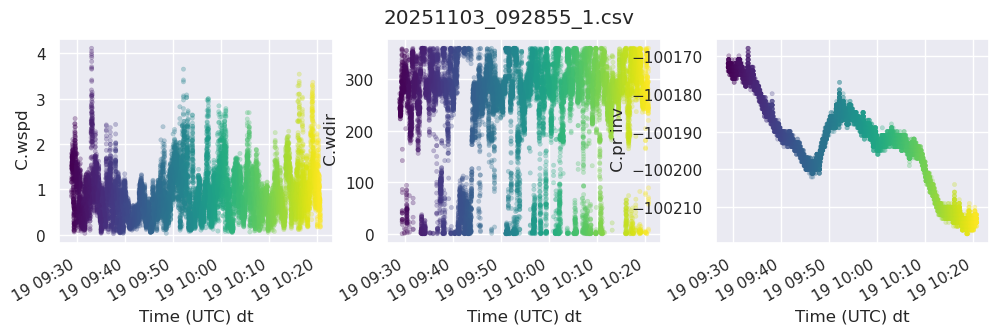

/tmp/ipykernel_206524/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


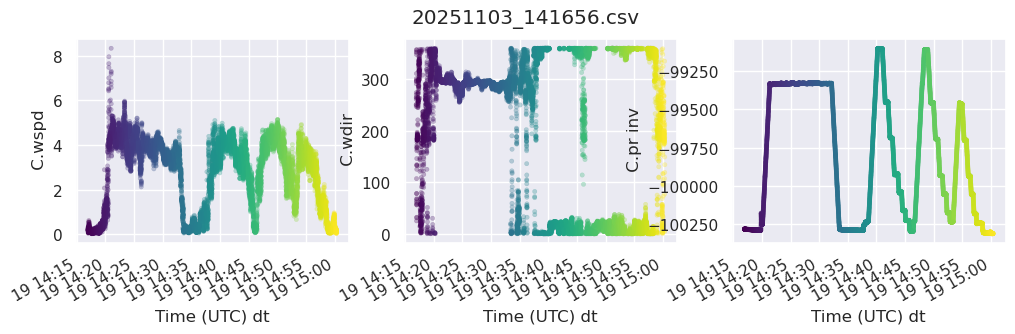

/tmp/ipykernel_206524/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


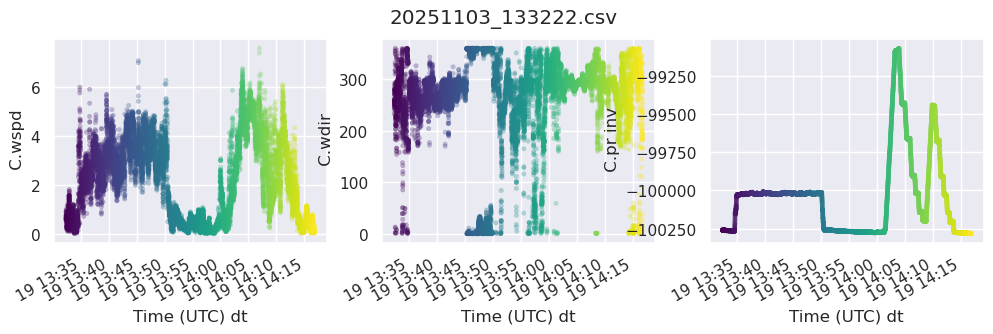

In [8]:
tris_folder = "/indian/UAS_project_data/2025_11_03_Arluno/trisonica"

for tris_file in os.listdir(tris_folder):
    tris_df = pd.read_csv(os.path.join(tris_folder,tris_file),sep=';',header=8)
    
    tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])
    tris_df[' C.pr inv'] = -tris_df[' C.pr']

    fig,axes=plt.subplots(1,3,figsize=(12,3))
    fig.suptitle(f"{tris_file}")

    sns.scatterplot(
            data=tris_df,
            x='Time (UTC) dt',
            y=' C.wspd',
            hue='Time (UTC) dt',
            legend=False,
            ax=axes[0],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
            s=10,    
        )

    sns.scatterplot(
            data=tris_df,
            x='Time (UTC) dt',
            y=' C.wdir',
            hue='Time (UTC) dt',
            legend=False,
            ax=axes[1],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
            s=10,    
        )

    sns.scatterplot(
            data=tris_df,
            x='Time (UTC) dt',
            y=' C.pr inv',
            hue='Time (UTC) dt',
            legend=False,
            ax=axes[2],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
            s=10,    
        )

    fig.autofmt_xdate(rotation=30, ha='right')

    plt.show()

In [ ]:
tris_df = pd.read_csv(os.path.join(tris_folder, tris_file), sep=';', header=8,parse_dates=['Time (UTC)'],skipinitialspace=True)
tris_df['C.pr']

/tmp/ipykernel_205167/1521337927.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df = pd.read_csv(os.path.join(tris_folder, tris_file), sep=';', header=8,parse_dates=['Time (UTC)'],skipinitialspace=True)


0        100261
1        100260
2        100259
3        100260
4        100259
          ...  
13329    100283
13330    100283
13331    100282
13332    100282
13333    100282
Name: C.pr, Length: 13334, dtype: int64

In [18]:
pd.Timedelta(value=duration,unit='s')>interval_df['Time (UTC)'].iloc[-1]-interval_df['Time (UTC)'].iloc[0]

False

/tmp/ipykernel_206524/3054853621.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df = pd.read_csv(os.path.join(tris_folder, tris_file), sep=';', header=8,parse_dates=['Time (UTC)'],skipinitialspace=True)


Processed 20251103_150349.csv: 50 hovering phases detected



/tmp/ipykernel_206524/3054853621.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df = pd.read_csv(os.path.join(tris_folder, tris_file), sep=';', header=8,parse_dates=['Time (UTC)'],skipinitialspace=True)


Processed 20251103_092855.csv: 1 hovering phases detected



/tmp/ipykernel_206524/3054853621.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df = pd.read_csv(os.path.join(tris_folder, tris_file), sep=';', header=8,parse_dates=['Time (UTC)'],skipinitialspace=True)


Processed 20251103_103006.csv: 8 hovering phases detected



/tmp/ipykernel_206524/3054853621.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df = pd.read_csv(os.path.join(tris_folder, tris_file), sep=';', header=8,parse_dates=['Time (UTC)'],skipinitialspace=True)


Processed 20251103_092855_1.csv: 1 hovering phases detected



/tmp/ipykernel_206524/3054853621.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df = pd.read_csv(os.path.join(tris_folder, tris_file), sep=';', header=8,parse_dates=['Time (UTC)'],skipinitialspace=True)


Processed 20251103_141656.csv: 26 hovering phases detected



/tmp/ipykernel_206524/3054853621.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df = pd.read_csv(os.path.join(tris_folder, tris_file), sep=';', header=8,parse_dates=['Time (UTC)'],skipinitialspace=True)


Processed 20251103_133222.csv: 17 hovering phases detected



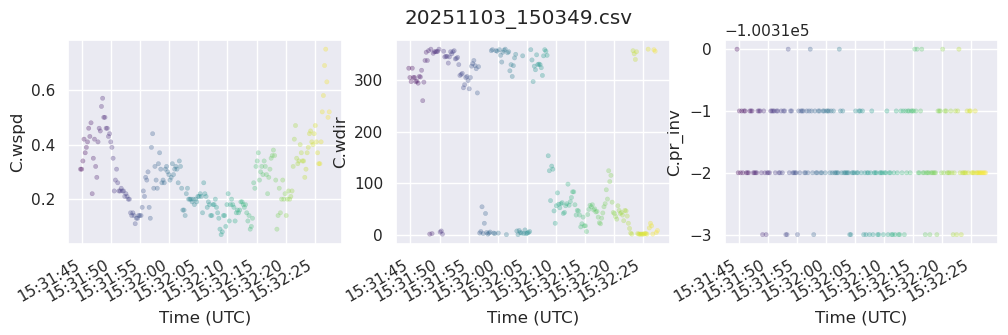

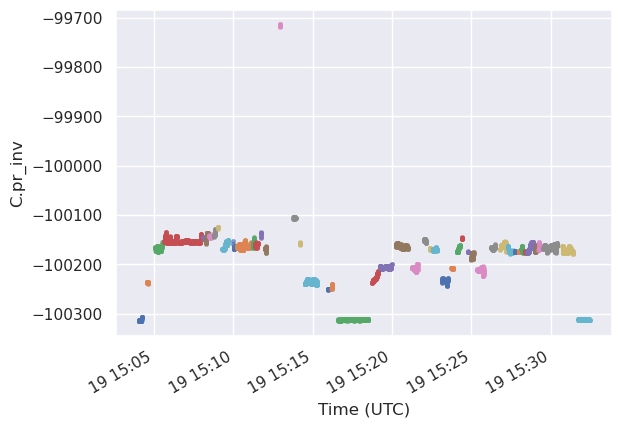

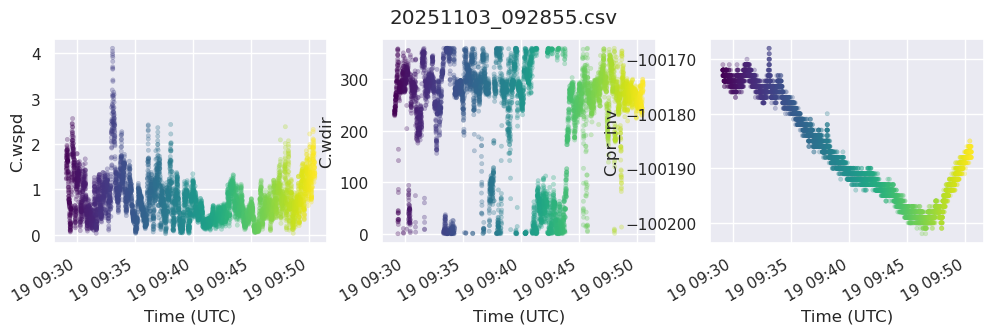

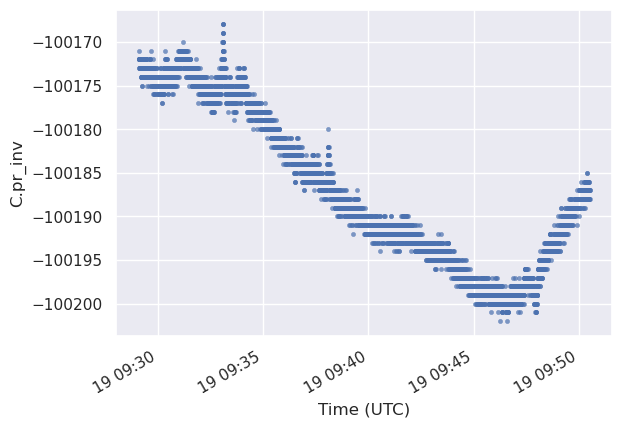

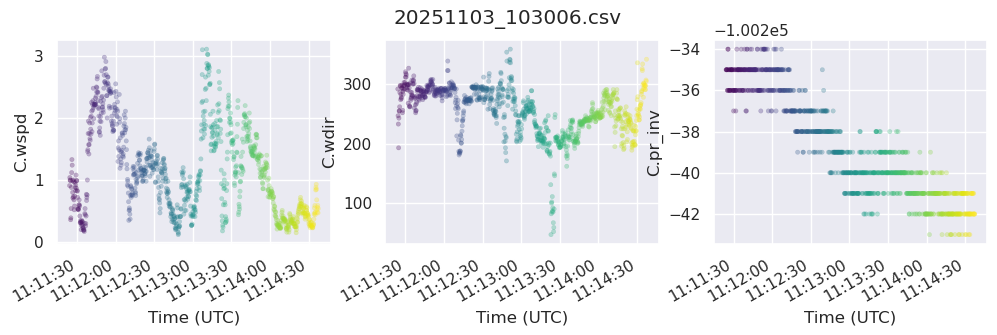

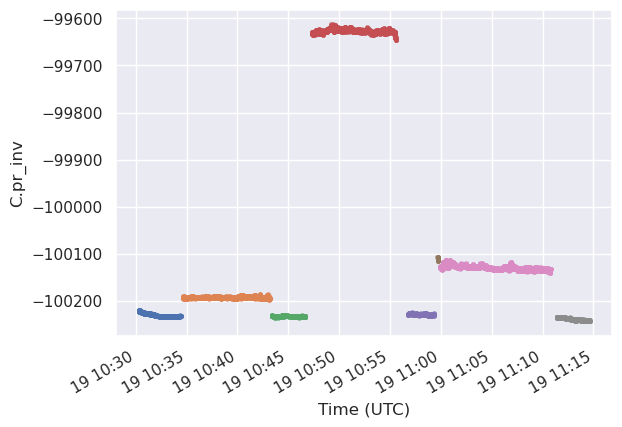

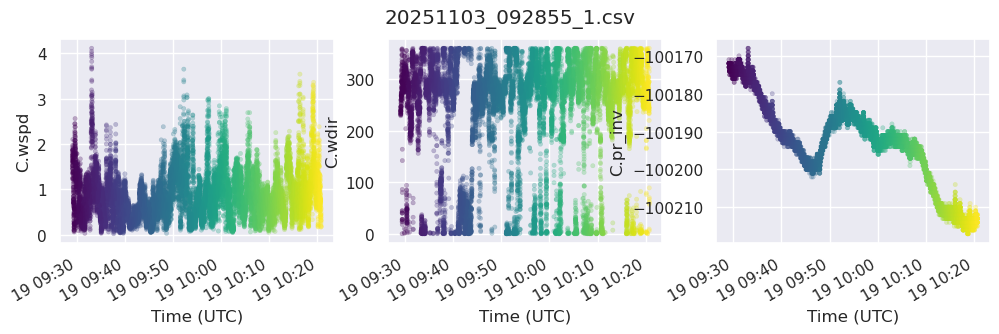

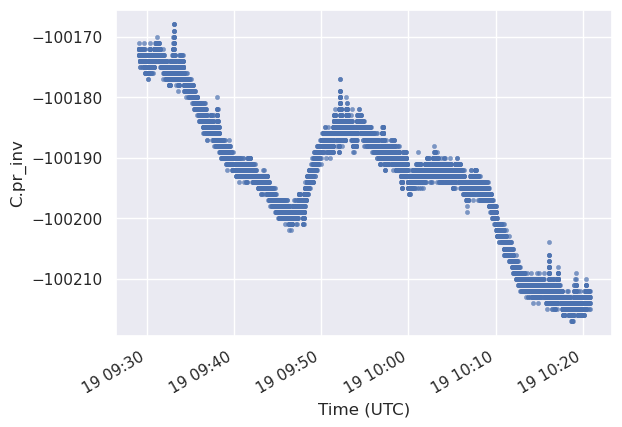

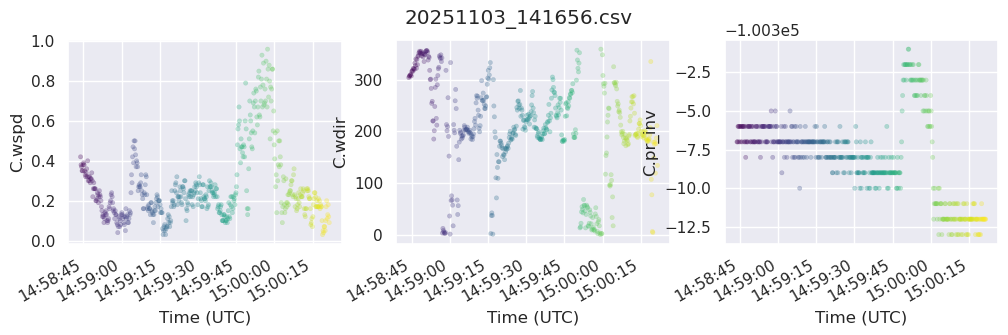

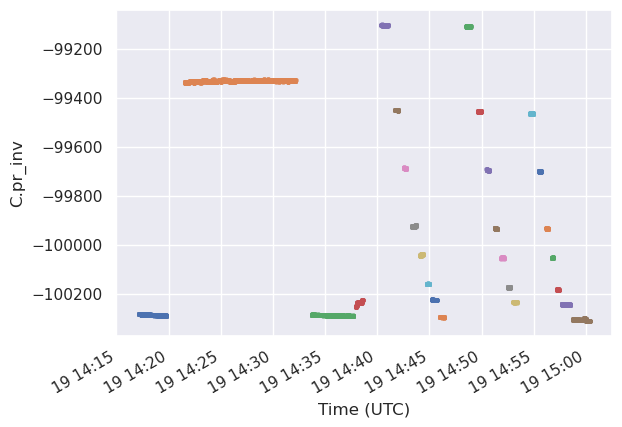

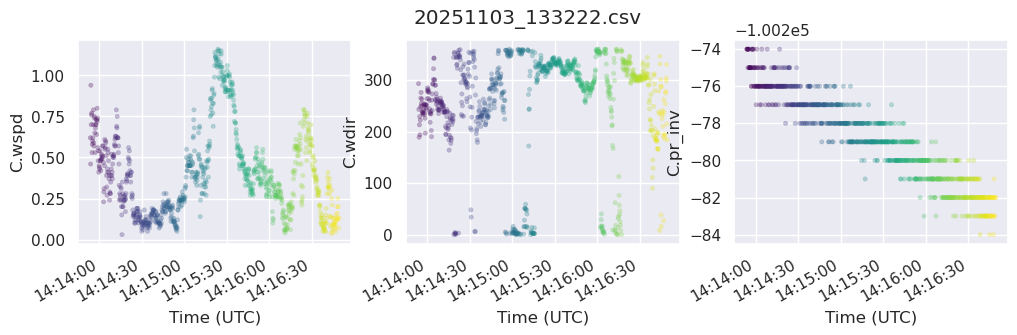

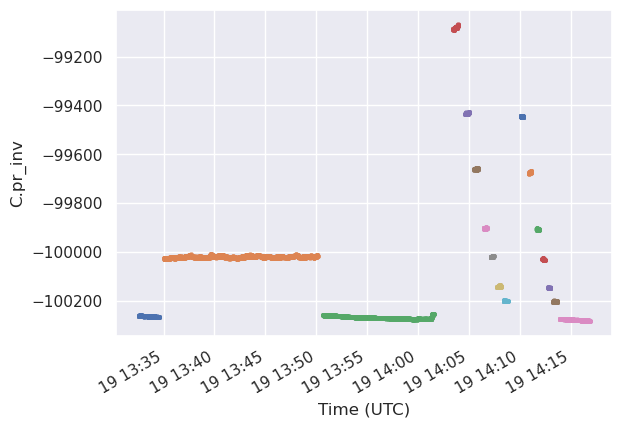

In [34]:
tris_folder = "/indian/UAS_project_data/2025_11_03_Arluno/trisonica"
output_folder = "/indian/UAS_project_data/2025_11_03_Arluno/trisonica/trisonica_hoverings"

#os.makedirs(output_folder, exist_ok=True)

# Parameters for hovering detection
pressure_threshold = 20  # Pa 
diff_period = 50
min_hovering_duration = 5  # seconds 
edges_trimming = 10 # samples

for tris_file in os.listdir(tris_folder):
    if not tris_file.endswith('.csv'):
        continue
    
    tris_df = pd.read_csv(os.path.join(tris_folder, tris_file), sep=';', header=8,parse_dates=['Time (UTC)'],skipinitialspace=True)
    
    tris_df['pressure_delta'] = tris_df['C.pr'].diff(periods=diff_period).abs()
    tris_df['C.pr_inv'] = -tris_df['C.pr']
    
    hovering = tris_df['pressure_delta'] < pressure_threshold
    
    # Identify where hovering status changes
    transitions = hovering.astype(int).diff().fillna(0) != 0
    transition_indices = np.where(transitions)[0]
    
    intervals = []
    start_idx = 0
    
    for idx in transition_indices:
        if hovering.iloc[start_idx]:  # Current phase is hovering
            interval_df = tris_df.iloc[start_idx:idx]
            
            if pd.Timedelta(value=min_hovering_duration,unit='s')<interval_df['Time (UTC)'].iloc[-1]-interval_df['Time (UTC)'].iloc[0]:
                intervals.append(interval_df.iloc[edges_trimming:-edges_trimming])
        
        start_idx = idx
    
    if hovering.iloc[start_idx]:
        interval_df = tris_df.iloc[start_idx:]
        duration = (interval_df['Time (UTC)'].iloc[-1] - interval_df['Time (UTC)'].iloc[0]).total_seconds()
        
        if duration >= min_hovering_duration:
            intervals.append(interval_df)

            fig,axes=plt.subplots(1,3,figsize=(12,3))
            fig.suptitle(f"{tris_file}")

            sns.scatterplot(
                    data=interval_df,
                    x='Time (UTC)',
                    y='C.wspd',
                    hue='Time (UTC)',
                    legend=False,
                    ax=axes[0],
                    edgecolor=None,
                    alpha=0.3,
                    palette='viridis',
                    s=10,    
                )

            sns.scatterplot(
                    data=interval_df,
                    x='Time (UTC)',
                    y='C.wdir',
                    hue='Time (UTC)',
                    legend=False,
                    ax=axes[1],
                    edgecolor=None,
                    alpha=0.3,
                    palette='viridis',
                    s=10,    
                )

            sns.scatterplot(
                    data=interval_df,
                    x='Time (UTC)',
                    y='C.pr_inv',
                    hue='Time (UTC)',
                    legend=False,
                    ax=axes[2],
                    edgecolor=None,
                    alpha=0.3,
                    palette='viridis',
                    s=10,    
                )

            fig.autofmt_xdate(rotation=30, ha='right')
    
    base_filename = os.path.splitext(tris_file)[0]
    
    fig,ax = plt.subplots()
    fig.autofmt_xdate(rotation=30, ha='right')
    for i, interval_df in enumerate(intervals, start=1):

        sns.scatterplot(
                data=interval_df,
                x='Time (UTC)',
                y='C.pr_inv',
                ax=ax,
                edgecolor=None,
                alpha=0.7,
                s=10,
            )
        
        output_filename = f"{base_filename}_h{i}.csv"
        output_path = os.path.join(output_folder, output_filename)


        #interval_df.to_csv(output_path, sep=';', index=False)
        #print(f"Saved: {output_filename} ({len(interval_df)} rows, {duration:.1f}s)")
    
    print(f"Processed {tris_file}: {len(intervals)} hovering phases detected\n")

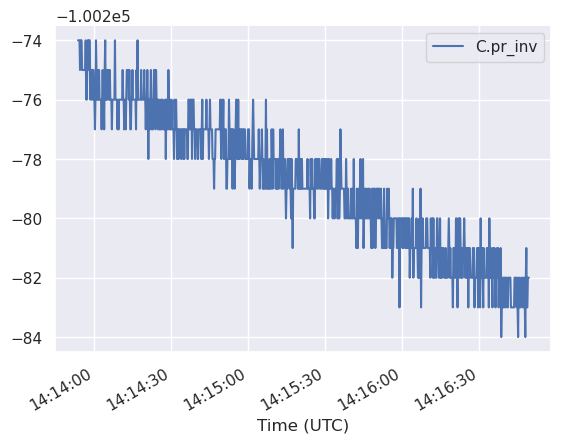

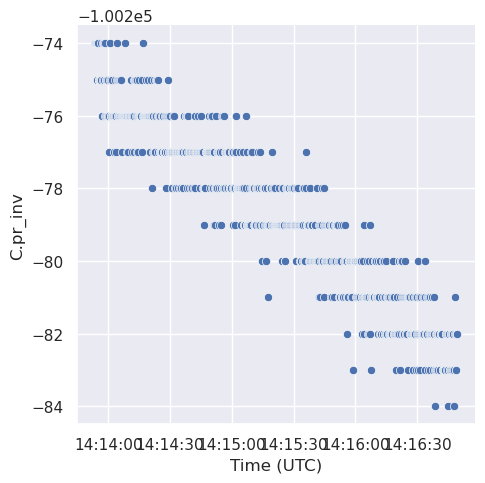

In [31]:
interval_df.plot(x='Time (UTC)', y='C.pr_inv')
sns.relplot(interval_df, x='Time (UTC)', y='C.pr_inv')

In [28]:
tris_df

,Time (UTC),SKH1_70727633.pr,SKH1_70727633.bat,SKH1_70727633.temp,SKH1_70727633.rh,C.wspd,C.wdir,C.windU,C.windV,C.windW,...,C.rh,C.pr,C.pitch,C.roll,C.heading,SKH1_70727633.lat,SKH1_70727633.lon,SKH1_70727633.alt,pressure_delta,C.pr_inv
0,2025-11-19 13:32:22.171,100067.0,7.809,19.89,50.23,0.61,233,0.47,0.36,0.12,...,73.2,100261,5.2,-1.3,0,NaN,NaN,NaN,NaN,-100261
1,2025-11-19 13:32:22.343,NaN,NaN,NaN,NaN,0.53,250,0.50,0.18,-0.02,...,72.5,100260,5.3,-1.4,0,NaN,NaN,NaN,NaN,-100260
2,2025-11-19 13:32:22.541,NaN,NaN,NaN,NaN,0.66,241,0.58,0.32,0.02,...,73.4,100259,4.7,-0.9,0,NaN,NaN,NaN,NaN,-100259
3,2025-11-19 13:32:22.743,NaN,NaN,NaN,NaN,0.64,260,0.63,0.11,0.08,...,72.2,100260,4.8,-1.2,0,NaN,NaN,NaN,NaN,-100260
4,2025-11-19 13:32:22.941,100067.0,7.721,19.92,50.25,0.60,262,0.59,0.09,0.03,...,72.8,100259,5.0,-1.3,0,NaN,NaN,NaN,NaN,-100259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13329,2025-11-19 14:16:48.557,NaN,NaN,NaN,NaN,0.25,304,0.21,-0.14,-0.04,...,60.8,100283,2.5,-0.1,0,NaN,NaN,NaN,1.0,-100283
13330,2025-11-19 14:16:48.734,100089.0,7.711,19.87,51.13,0.20,298,0.18,-0.09,-0.03,...,57.8,100283,2.9,0.6,0,45.52058,8.942663,161.1,0.0,-100283
13331,2025-11-19 14:16:48.933,NaN,NaN,NaN,NaN,0.13,330,0.06,-0.10,-0.06,...,56.6,100282,2.3,0.2,0,NaN,NaN,NaN,0.0,-100282
13332,2025-11-19 14:16:49.138,NaN,NaN,NaN,NaN,0.07,215,0.04,0.05,-0.03,...,59.1,100282,2.3,0.1,0,NaN,NaN,NaN,1.0,-100282
